# Data Analysis and Data Science
## Be curious about the data 

By: NOME
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>


**Student Name**: 

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [83]:
import pandas as pd
import seaborn as sns

In [84]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [85]:
## Define variable with file name

fn = "/u/delguide/data_analysis/code_github/datasets/breast_cancer_metametric.tsv"

In [86]:
## Read ans save data into variable as a dataframe

data = pd.read_table(fn)

## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [87]:
data.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


In [88]:
smp = len(data)
print("There are", smp, "rows a.k.a. patients")

There are 1104 rows a.k.a. patients


In [89]:
var = len(data.columns)
print("There are", var, "columns a.k.a. variables")

There are 14 columns a.k.a. variables


***
2. How many age groups are considered?

In [90]:
print("Nb. of age groups:", data.loc[:, 'AGE_GROUP'].nunique())


Nb. of age groups: 6


***
3. What is the mean overall survival (in month)?

In [91]:
MOS = data['OS_MONTHS'].mean()


print("The mean overall survival is", round(MOS, 2), "months")

The mean overall survival is 126.1 months


***
4. What is the highest mutation count?

In [92]:
max_mutat = data['MUTATION_COUNT'].max()
print("The highest mutational count is", max_mutat, "mutations")

The highest mutational count is 46.0 mutations


***
5. How large is the smallest tumor?

In [93]:
min_size = data['TUMOR_SIZE'].min()
print("The minimum tumor size is", min_size," cm")

The minimum tumor size is 1.0  cm


***
6. What are the grade considered in the dataset?

In [94]:
print("Grades:", data.loc[:, 'GRADE'].unique())

Grades: [3. 2. 1.]


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [95]:
med_NPI = data.loc[:, 'NPI'].median()
print("Median NPI: ", med_NPI)

Median NPI:  4.046


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [96]:
print("CHEMOTHERAPY:", data.loc[:, 'CHEMOTHERAPY'].unique())
print("HORMONE_THERAPY:", data.loc[:, 'HORMONE_THERAPY'].unique())
print("RADIO_THERAPY:", data.loc[:, 'RADIO_THERAPY'].unique())
print("BREAST_SURGERY:", data.loc[:, 'BREAST_SURGERY'].unique())

print("These values probably represent True(1) or False(0), a.k.a. whether the patient received this type of treatment.")

CHEMOTHERAPY: [1. 0.]
HORMONE_THERAPY: [1. 0.]
RADIO_THERAPY: [1. 0.]
BREAST_SURGERY: [0. 1.]
These values probably represent True(1) or False(0), a.k.a. whether the patient received this type of treatment.


***
10. How many patients in the dataset have had breast surgery?

In [97]:
breast_p = (data.loc[data.BREAST_SURGERY == 1.0])
print(len(breast_p), "patients have had breast surgery")

468 patients have had breast surgery


## Visualize the data [30 pts pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [98]:
## Import the seaborn library
import seaborn as sns

In [99]:
data.tail(10)

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
1094,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,6.0,4.040,184.333333,20.0,1.0,60.0
1095,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,5.050,20.666667,25.0,3.0,50.0
1096,0.0,0.0,1.0,1.0,0.0,2.0,2.0,3.0,3.0,3.022,185.000000,11.0,1.0,40.0
1097,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,11.0,6.080,184.266667,40.0,3.0,40.0
1098,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,9.0,4.026,80.500000,13.0,1.0,40.0
1099,0.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,7.0,4.036,212.200000,18.0,1.0,60.0
1100,0.0,0.0,0.0,0.0,1.0,2.0,3.0,3.0,15.0,4.050,51.966667,25.0,2.0,60.0
1101,0.0,1.0,1.0,0.0,2.0,2.0,3.0,3.0,8.0,6.060,80.733333,30.0,3.0,60.0
1102,0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,8.0,3.050,87.733333,25.0,2.0,60.0
1103,0.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,4.0,3.024,175.333333,12.0,1.0,40.0


In [100]:
## Set global theme parameters
sns.set(rc={'figure.figsize':(5, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

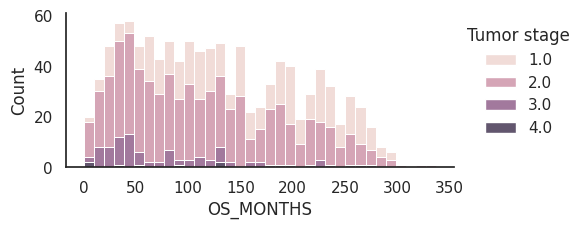

In [101]:
### Figure

### We want the distribution to be stage-specific

p = sns.histplot(data, x="OS_MONTHS", bins=35, multiple="stack", hue="TUMOR_STAGE")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title='Tumor stage', frameon=False)
sns.despine()

In [102]:
### Interpretation

print("Lower stage tumors tend to have longer overall survival. This makes sense because they will take more time evolve into metastases. \nEarlier stages tumors might also be more easily cured.")

Lower stage tumors tend to have longer overall survival. This makes sense because they will take more time evolve into metastases. 
Earlier stages tumors might also be more easily cured.


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [103]:
### Hypothesis

print("I want to test the hypothesis that older patients have a shorter overall survival")

I want to test the hypothesis that older patients have a shorter overall survival


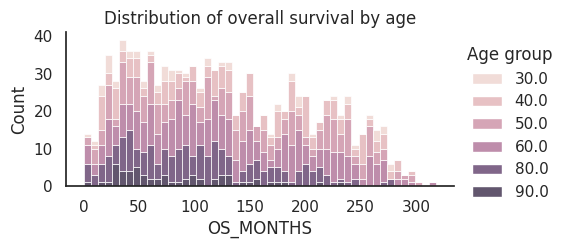

In [104]:
### Figure

### We want the distribution to be age-specific
p = sns.histplot(data, x="OS_MONTHS", multiple="stack", hue="AGE_GROUP", bins=50)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title='Age group', frameon=False)
p.set_title('Distribution of overall survival by age')
sns.despine()

In [105]:
### Interpretation

print("Patients that are part of the older age groups tend to have a shorter overall survival. This could be due to reduced fitness and reduced responsiveness to treatment with aging. \nHowever, we must be cautious when interpreting data from older individual because mortality can be due to other causes than cancer.")

Patients that are part of the older age groups tend to have a shorter overall survival. This could be due to reduced fitness and reduced responsiveness to treatment with aging. 
However, we must be cautious when interpreting data from older individual because mortality can be due to other causes than cancer.


In [106]:
# Another hypothesis

print('Hypothesis: patients with a higher NPI have shorter overall survival')

Hypothesis: patients with a higher NPI have shorter overall survival


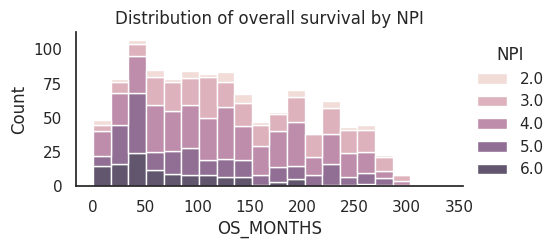

In [107]:
# Figure
### We want the distribution to be NPI-specific
p = sns.histplot(data, x="OS_MONTHS", multiple="stack", hue=round(data.NPI), bins=20)
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title='NPI', frameon=False)
p.set_title('Distribution of overall survival by NPI')
sns.despine()

In [108]:
# Interpretation

print("Patients with higher Nottingham Prognostic Index (NPI) tend to survive for a shorter time. This means that the physician's analysis is accurate.")

Patients with higher Nottingham Prognostic Index (NPI) tend to survive for a shorter time. This means that the physician's analysis is accurate.


In [109]:
# Another hypothesis

print('Hypothesis: patients with higher mutational burden have lower survival')

Hypothesis: patients with higher mutational burden have lower survival


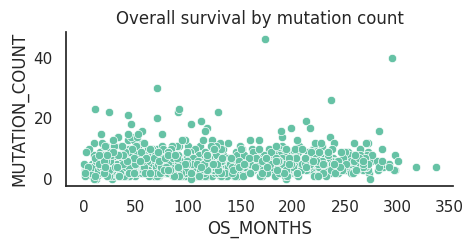

In [110]:
# Figure
### We want the distribution to be mutation count-specific
p = sns.scatterplot(data=data, x="OS_MONTHS", y="MUTATION_COUNT")
p.set_title('Overall survival by mutation count')
sns.despine()

In [111]:
# Interpretation

print("There does not seem to be a correlation between mutation count and overall survival in this dataset. This could be due to the fact that only certain specific mutations really drive cancer progression and other are passengers. It could also mean that the cancer could be due to epigenetic dysregulation.")

There does not seem to be a correlation between mutation count and overall survival in this dataset. This could be due to the fact that only certain specific mutations really drive cancer progression and other are passengers. It could also mean that the cancer could be due to epigenetic dysregulation.
